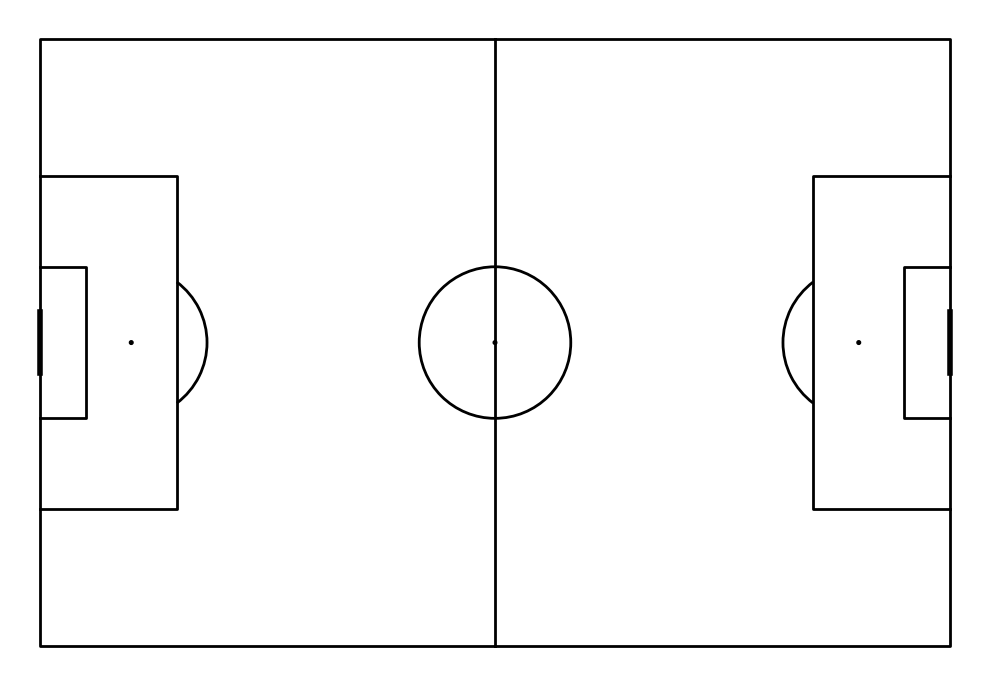

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from io import BytesIO
import base64

# Create a synthetic dataset of passes for two teams
data = {
    'x': np.random.uniform(0, 120, 1000),  # x-coordinates of the passes
    'y': np.random.uniform(0, 80, 1000),   # y-coordinates of the passes
    'team': np.random.choice(['Team A', 'Team B'], 1000)  # team making the pass
}

df = pd.DataFrame(data)

# Define pitch dimensions (length and width)
pitch_length = 120
pitch_width = 80

# Divide pitch into 30 zones (e.g., 5 rows x 6 columns)
num_vertical_zones = 5
num_horizontal_zones = 6

# Calculate zone boundaries
x_bins = np.linspace(0, pitch_length, num_horizontal_zones + 1)
y_bins = np.linspace(0, pitch_width, num_vertical_zones + 1)

# Count passes in each zone for each team
df['x_bin'] = pd.cut(df['x'], bins=x_bins, labels=False)
df['y_bin'] = pd.cut(df['y'], bins=y_bins, labels=False)

pass_counts = df.groupby(['x_bin', 'y_bin', 'team']).size().unstack(fill_value=0)

# Calculate the difference between Team A and Team B in each zone
pass_diff = pass_counts.get('Team A', 0) - pass_counts.get('Team B', 0)

# Create a 2D array of the differences with proper shape
pass_diff_matrix = np.zeros((num_vertical_zones, num_horizontal_zones))

for (x_bin, y_bin), value in pass_diff.items():
    pass_diff_matrix[y_bin, x_bin] = value

# Prepare data for heatmap plotting
x_bin_centers = (x_bins[:-1] + x_bins[1:]) / 2
y_bin_centers = (y_bins[:-1] + y_bins[1:]) / 2

# Create the pitch using mplsoccer and convert it to an image
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))

# Save the pitch plot to a BytesIO object
buf = BytesIO()
fig.savefig(buf, format="png", bbox_inches='tight', pad_inches=0)
buf.seek(0)

# Encode the BytesIO object as a base64 string
image_base64 = base64.b64encode(buf.read()).decode('utf-8')

# Create the plotly heatmap with the pitch image as the background
heatmap = go.Heatmap(
    z=pass_diff_matrix,
    x=x_bin_centers,
    y=y_bin_centers,
    colorscale='RdBu',
    colorbar=dict(title='Pass Difference (Team A - Team B)'),
    showscale=True,
    zmid=0
)

fig = go.Figure(data=[heatmap])

# Add the pitch image as a background
fig.add_layout_image(
    dict(
        source=f'data:image/png;base64,{image_base64}',
        xref="x",
        yref="y",
        x=0,
        y=pitch_width,
        sizex=pitch_length,
        sizey=pitch_width,
        sizing="stretch",
        opacity=1,
        layer="below"
    )
)

# Update layout for better appearance
fig.update_layout(
    title='Difference in Number of Passes between Team A and Team B',
    xaxis=dict(title='X-coordinate', range=[0, pitch_length]),
    yaxis=dict(title='Y-coordinate', range=[0, pitch_width], scaleanchor="x", scaleratio=1, autorange="reversed"),
    width=800,
    height=600,
)

fig.show()


In [6]:
import numpy as np
import random

from plotly_football_pitch import make_pitch_figure, PitchDimensions, add_heatmap


dimensions = PitchDimensions()
fig = make_pitch_figure(dimensions)

# define number of grid squares for heatmap data
width_grid = 12
length_grid = 15

data = np.array([
    [random.random() for _ in range(length_grid)]
    for _ in range(width_grid)
])

fig = add_heatmap(fig, data)
fig.show()

array([[1.57476197e-01, 5.53824544e-01, 6.68709091e-01, 4.23216373e-01,
        1.36860045e-01, 5.90295355e-01, 6.58132178e-01, 6.19956298e-01,
        5.80878337e-01, 2.63352441e-01, 7.59071264e-01, 1.38389472e-01,
        5.10178983e-01, 1.29602658e-01, 5.13755063e-01],
       [6.85512753e-01, 5.92667751e-01, 3.86253625e-01, 4.73837710e-01,
        6.28958355e-01, 1.94915089e-01, 9.98297544e-01, 9.68839008e-01,
        2.70544546e-01, 7.66174508e-02, 9.31951624e-01, 6.17274992e-02,
        4.79546566e-01, 6.12186906e-01, 2.53503145e-01],
       [1.42565576e-01, 6.77539983e-01, 1.51253520e-01, 4.69842453e-01,
        9.37617255e-01, 4.50658749e-03, 6.10013565e-01, 9.68303849e-01,
        4.45952090e-01, 7.18496388e-01, 5.72917329e-01, 9.96838883e-01,
        5.15583687e-01, 1.83577769e-02, 6.76182606e-01],
       [8.76144499e-02, 9.00279226e-01, 1.51340300e-01, 7.26099498e-01,
        8.28794210e-01, 7.74900629e-01, 1.22727398e-01, 7.60776027e-01,
        8.48336808e-01, 3.57891489e-0

In [8]:
import numpy as np
import plotly.graph_objects as go

# Original matrix
matrix = np.array([[  0.,  -4.,   8.,  -5.,  -2.,  -3.],
                   [  2.,  -3.,  -4., -11., -10., -11.],
                   [  7.,  -7., -10., -10.,  -8.,  -8.],
                   [ -1.,  -4.,  -8.,  -2.,  -6.,  -1.],
                   [ -2.,  -9.,  -7., -11.,   2.,   0.]])

# Convert to binary categories: 0 for 'Less than 0', 1 for 'Bigger than 0'
binary_matrix = np.where(matrix > 0, 1, 0)

# Prepare data for Plotly
z_values = binary_matrix

# Define colors for the binary values
colors = ['red', 'green']

# Create heatmap
heatmap = go.Figure(data=go.Heatmap(
    z=z_values,
    x=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6'],  # Example column labels
    y=['Row1', 'Row2', 'Row3', 'Row4', 'Row5'],          # Example row labels
    colorscale=[[0, 'red'], [1, 'green']],
    showscale=False,
    zmin=0,  # Set min value for colorscale
    zmax=1   # Set max value for colorscale
))

# Update layout for better readability
heatmap.update_layout(
    title='Categorical Heatmap',
    xaxis_title='Category B',
    yaxis_title='Category A',
    xaxis=dict(tickmode='array', tickvals=list(range(6)), ticktext=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6']),
    yaxis=dict(tickmode='array', tickvals=list(range(5)), ticktext=['Row1', 'Row2', 'Row3', 'Row4', 'Row5'])
)

heatmap.show()


In [8]:
import numpy as np
import plotly.graph_objects as go

def simulate_game(xg_team1, xg_team2, num_simulations=1000):
    max_goals = 5
    result_matrix = np.zeros((max_goals + 1, max_goals + 1))

    for _ in range(num_simulations):
        # Simulate goals for team 1
        goals_team1 = np.random.poisson(xg_team1)
        goals_team1 = min(goals_team1, max_goals)

        # Simulate goals for team 2
        goals_team2 = np.random.poisson(xg_team2)
        goals_team2 = min(goals_team2, max_goals)

        # Increment the corresponding cell in the result matrix
        result_matrix[goals_team1, goals_team2] += 1

    # Convert counts to probabilities
    result_matrix /= num_simulations

    return result_matrix

def plot_heatmap(matrix):
    # Create text labels for the heatmap cells
    text = [[f'{prob:.2%}' for prob in row] for row in matrix]
    
    fig = go.Figure(data=go.Heatmap(
        z=matrix,
        x=[0, 1, 2, 3, 4, 5],
        y=[0, 1, 2, 3, 4, 5],
        colorscale='reds',
        text=text,
        hoverinfo='text'
    ))

    fig.update_layout(
        title='Probability Matrix (Team 1 goals vs Team 2 goals)',
        xaxis_title='Team 2 Goals',
        yaxis_title='Team 1 Goals'
    )

    fig.show()

def plot_bar_chart(probabilities, team_name):
    max_goals = 5
    goals = list(range(max_goals + 1))
    max_prob_index = np.argmax(probabilities)

    colors = ['blue'] * (max_goals + 1)
    colors[max_prob_index] = 'red'

    fig = go.Figure(data=[go.Bar(
        x=goals,
        y=probabilities,
        marker_color=colors,
        text=[f'{prob:.2%}' for prob in probabilities],
        textposition='auto'
    )])

    fig.update_layout(
        title=f'Probability of Goals for {team_name}',
        xaxis_title='Number of Goals',
        yaxis_title='Probability'
    )

    fig.show()

# Example usage with some expected goals (xG) for each shot
xg_team1_shots = [0.1, 0.2, 0.15, 0.05]  # Example xG values for Team 1
xg_team2_shots = [0.05, 0.1, 0.25]       # Example xG values for Team 2

# Sum the expected goals for each team
xg_team1_total = sum(xg_team1_shots)
xg_team2_total = sum(xg_team2_shots)

# Run the simulation
result_probabilities = simulate_game(xg_team1_total, xg_team2_total, num_simulations=1000)

# Print the 6x6 probability matrix
print("Probability matrix (Team 1 goals vs Team 2 goals):")
print(result_probabilities)

# Plot the heatmap
plot_heatmap(result_probabilities)

# Calculate marginal probabilities for each team
team1_probabilities = result_probabilities.sum(axis=1)
team2_probabilities = result_probabilities.sum(axis=0)

# Plot bar charts for each team
plot_bar_chart(team1_probabilities, 'Team 1')
plot_bar_chart(team2_probabilities, 'Team 2')

Probability matrix (Team 1 goals vs Team 2 goals):
[[0.403 0.161 0.027 0.003 0.001 0.   ]
 [0.209 0.077 0.025 0.002 0.001 0.   ]
 [0.047 0.015 0.004 0.001 0.    0.   ]
 [0.014 0.006 0.002 0.    0.    0.   ]
 [0.002 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]
